<a href="https://colab.research.google.com/github/masum1959/surface-crack-detection/blob/main/surface_crack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadmasum","key":"003f373d672e2104e703ac63d3ffea7d"}'}

In [ ]:
# create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder created

! cp kaggle.json ~/.kaggle/

In [ ]:
# permission for the json 
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets list

In [ ]:
! kaggle datasets download -d arunrk7/surface-crack-detection

 97% 225M/233M [00:08<00:00, 39.8MB/s]
100% 233M/233M [00:08<00:00, 28.5MB/s]


In [ ]:
! unzip surface-crack-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

import cv2
import os
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# labels = ['Negative', 'Positive'] 
# img_size = 120
# def read_images(data_dir):
#     data = [] 
#     for label in labels: 
#         path = os.path.join(data_dir, label) 
#         print(path)
#         class_num = labels.index(label)
#         print(class_num)
#         for img in os.listdir(path):
#             try:
#                 img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
#                 resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
#                 data.append([resized_arr, class_num])
#             except Exception as e:
#                 print(e)
#     return np.array(data)
    

# Dataset = read_images('/kaggle/input/surface-crack-detection')

In [ ]:
neg_img_path = []
for img in os.listdir('/content/Negative/'):
  neg_img_path.append('/content/Negative/'+img)


In [ ]:
pos_img_path = []
for img in os.listdir('/content/Positive/'):
  pos_img_path.append('/content/Positive/'+img)

In [ ]:
len(pos_img_path)

20000

In [ ]:
len(neg_img_path)

20000

In [ ]:
pos_df = pd.DataFrame({"image_path": pos_img_path, 
              "label": np.zeros(len(pos_img_path))})

In [ ]:
neg_df = pd.DataFrame({"image_path": neg_img_path, 
              "label": np.ones(len(neg_img_path))})

In [ ]:
total_df = pos_df.append(neg_df, ignore_index= True)

In [ ]:
total_df = total_df.sample(frac=.1).reset_index().drop('index', axis = 1)

In [ ]:
total_df['label'] = total_df['label'].apply(lambda x: str(x))

Reading Few Images

In [ ]:
from PIL import Image

In [ ]:
plt.imread(total_df['image_path'][0]).shape

(227, 227, 3)

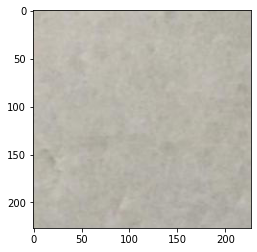

In [ ]:
plt.imshow(plt.imread(total_df['image_path'][0]))

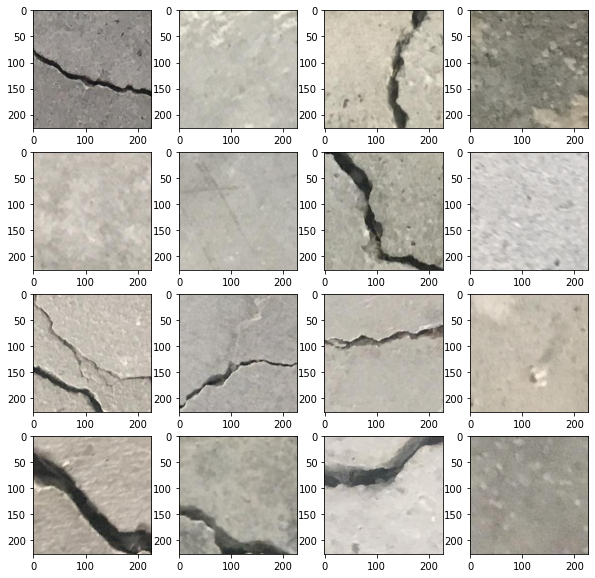

In [ ]:
rows = 4
cols = 4
fig = plt.figure(figsize= (10,10))
for i in range(1, cols*rows+1):
  fig.add_subplot(rows, cols, i)
  plt.imshow(plt.imread(total_df['image_path'][i]))
plt.show()  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(total_df, test_size= 0.20, random_state= 2022)

In [ ]:
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [ ]:
datagen=ImageDataGenerator(rescale=1./255., validation_split=0.25)

In [ ]:
train_generator=datagen.flow_from_dataframe(dataframe= train_df, 
                                            x_col = "image_path",
                                            y_col= "label",
                                            batch_size= 64, 
                                            seed = 2022, 
                                            class_mode= 'binary', 
                                            subset="training",
                                            target_size= (224,224))

Found 2400 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator=datagen.flow_from_dataframe(dataframe= train_df, 
                                            x_col = "image_path",
                                            y_col= "label",
                                            batch_size= 64, 
                                            seed = 2022, 
                                            class_mode= 'binary', 
                                            subset="validation",
                                            target_size= (224,224))

Found 800 validated image filenames belonging to 2 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,                                                                                         x_col = "image_path",
                                            y_col= "label",
                                            batch_size= 64, 
                                            seed = 2022, 
                                            class_mode= 'binary', 
                                            target_size= (224,224))

Found 800 validated image filenames belonging to 2 classes.


In [ ]:
# train_generator=datagen.flow_from_dataframe(dataframe=traindf,
# directory="./train/",
# x_col="id",
# y_col="label",
# subset="training",
# batch_size=32,
# seed=42,
# shuffle=True,
# class_mode="categorical",
# target_size=(32,32))
# valid_generator=datagen.flow_from_dataframe(
# dataframe=traindf,
# directory="./train/",
# x_col="id",
# y_col="label",
# subset="validation",
# batch_size=32,
# seed=42,
# shuffle=True,
# class_mode="categorical",
# target_size=(32,32))
# test_datagen=ImageDataGenerator(rescale=1./255.)
# test_generator=test_datagen.flow_from_dataframe(
# dataframe=testdf,
# directory="./test/",
# x_col="id",
# y_col=None,
# batch_size=32,
# seed=42,
# shuffle=False,
# class_mode=None,
# target_size=(32,32))

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(224,224,3)))
model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile( tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=1)

37/37 [==============================] - 11s 238ms/step - loss: 2.6148 - accuracy: 0.5261 - val_loss: 0.7293 - val_accuracy: 0.4974


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)

[0.7354767918586731, 0.484375]

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

12/12 [==============================] - 1s 109ms/step


Trasfer Learning

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras import Model

In [ ]:
# load model
model_vgg_fe = VGG16()
# remove the output layer
model_vgg_fe = Model(inputs=model_vgg_fe.inputs, outputs=model_vgg_fe.layers[-2].output)

553476096/553467096 [==============================] - 45s 0us/step


In [ ]:
model_vgg_fe.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
features_train = model_vgg_fe.predict_generator(generator=train_generator)

In [ ]:
features_validation = model_vgg_fe.predict_generator(generator=valid_generator)

In [ ]:
features_test = model_vgg_fe.predict_generator(generator=test_generator)

#PySpark

In [ ]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 29 kB/s 
     |████████████████████████████████| 198 kB 80.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=5a69cafb8f58498ce641e094f324e089e1f5a738b967922ecbaea8f017990db1
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
!pip install elephas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 15.3 MB/s 
     |████████████████████████████████| 281.3 MB 34 kB/s 
     |████████████████████████████████| 198 kB 21.1 MB/s 
  Created wheel for elephas: filename=elephas-3.1.0-py3-none-any.whl size=26259 sha256=14596872e792584e09376fc7c824d1cf2e1215b6d5743384b1814deffad1f779
  Stored in directory: /root/.cache/pip/wheels/33/e4/e1/56dda8be927bb0e9971cd7ddf3fc1b17ce78db56268b1f867f
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=bcdbe9f1178e8bf0e8c5a859d60504613fe1cd4479eeb6bd32c417583f0248aa
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built elephas pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.3
    Uninstalling py4j-0.10.9.3:
      Successfully uninstalled py4j-0.10.9.3
  Attempting 

In [ ]:
!pip install sparkdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 8.9 MB/s 


In [ ]:

import sparkdl

ModuleNotFoundError: ignored

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
# from sparkdl import DeepImageFeaturizer
from pyspark.sql import SQLContext
from pyspark.ml.feature import *
from pyspark.ml import Pipeline


In [ ]:
# Elephas for deep learning 
from elephas.ml_model import ElephasEstimator

Step 2: Start Spark Session

In [ ]:
conf = SparkConf().setAppName("DL").setMaster('local[6]')
sc = SparkContext(conf = conf)
sql_context = SQLContext(sc)

In [ ]:
sc

<SparkContext master=local[6] appName=DL>

Step 3

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from sparkdl import DeepImageFeaturizer
# model: InceptionV3
# extracting feature from images
featurizer = DeepImageFeaturizer(inputCol="image",
                                 outputCol="features",
                                 modelName="InceptionV3")